In [1]:
from dataset import get_loader
from tqdm import tqdm
import torch
import numpy as np
system = 'sst_envs'
model = 'acrobot_obs'
batch = 2
# setup = 'default'
setup = "default_norm"
%cd /media/arclabdl1/HD1/Linjun/mpc-mpnet-py/mpnet

/media/arclabdl1/HD1/Linjun/mpc-mpnet-py/mpnet


In [3]:
train_loader, test_loader = get_loader(system, model, batch_size=batch, setup=setup)

In [13]:
train_loader

In [14]:
for data, label in tqdm(train_loader):
    print(data, label)
    break

  0%|          | 0/41217 [00:00<?, ?it/s]

tensor([[ 5.0000,  0.4834,  0.6413, -0.2449,  0.1260,  1.2798, -0.1694,
          0.0000,  0.0000],
        [ 7.0000,  0.2600, -0.6279, -0.2180, -0.1001,  1.2239, -0.5965,
          0.0000,  0.0000]]) tensor([[-0.7111, -0.1914, -0.3330,  0.7253],
        [ 0.1942, -0.6273, -0.3734,  0.1441]])


In [15]:
data[0, 1:],label[0]

(tensor([ 0.4834,  0.6413, -0.2449,  0.1260,  1.2798, -0.1694,  0.0000,
          0.0000]), tensor([-0.7111, -0.1914, -0.3330,  0.7253]))

In [16]:
data[1, 1:],label[1]

(tensor([ 0.2600, -0.6279, -0.2180, -0.1001,  1.2239, -0.5965,  0.0000,
          0.0000]), tensor([ 0.1942, -0.6273, -0.3734,  0.1441]))

## distributions

In [17]:
inputs, gts = train_loader.dataset.tensors
inputs = inputs[:, 1:]
diff = gts - inputs[:, 4:] 
# diff[diff[:,0] < -np.pi] += 2*np.pi
# diff[diff[:,0] > np.pi] -= 2*np.pi
# diff[diff[:,1] < -np.pi] += 2*np.pi
# diff[diff[:,1] > np.pi] -= 2*np.pi

<IPython.core.display.Javascript object>


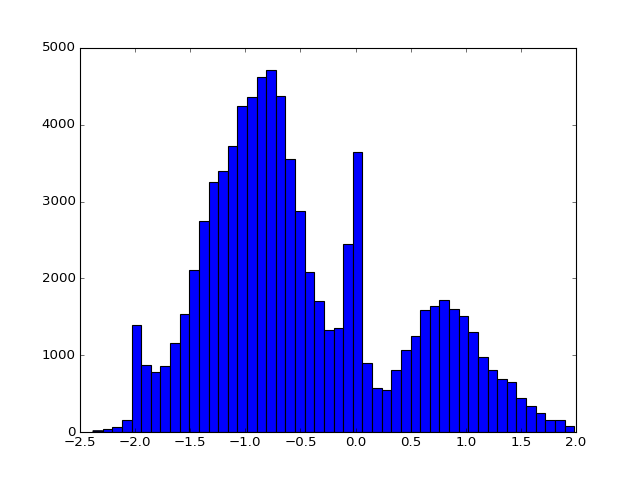

(array([  16.,   39.,   61.,  162., 1387.,  874.,  786.,  854., 1163.,
        1539., 2111., 2751., 3255., 3396., 3722., 4241., 4359., 4625.,
        4715., 4378., 3551., 2879., 2082., 1702., 1325., 1360., 2448.,
        3640.,  896.,  568.,  546.,  807., 1071., 1247., 1594., 1635.,
        1720., 1598., 1505., 1298.,  982.,  808.,  690.,  648.,  437.,
         334.,  242.,  155.,  150.,   81.]),
 array([-2.381768  , -2.294461  , -2.2071538 , -2.1198468 , -2.0325396 ,
        -1.9452325 , -1.8579254 , -1.7706183 , -1.6833112 , -1.5960041 ,
        -1.508697  , -1.4213899 , -1.3340828 , -1.2467757 , -1.1594687 ,
        -1.0721616 , -0.9848545 , -0.8975474 , -0.8102403 , -0.72293323,
        -0.63562614, -0.54831904, -0.46101195, -0.37370485, -0.28639776,
        -0.19909066, -0.11178356, -0.02447647,  0.06283062,  0.15013771,
         0.2374448 ,  0.3247519 ,  0.41205898,  0.49936607,  0.5866732 ,
         0.6739803 ,  0.7612874 ,  0.8485945 ,  0.9359015 ,  1.0232086 ,
         1.11051

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(diff[:, 0], bins=50)

tensor(108)


<IPython.core.display.Javascript object>


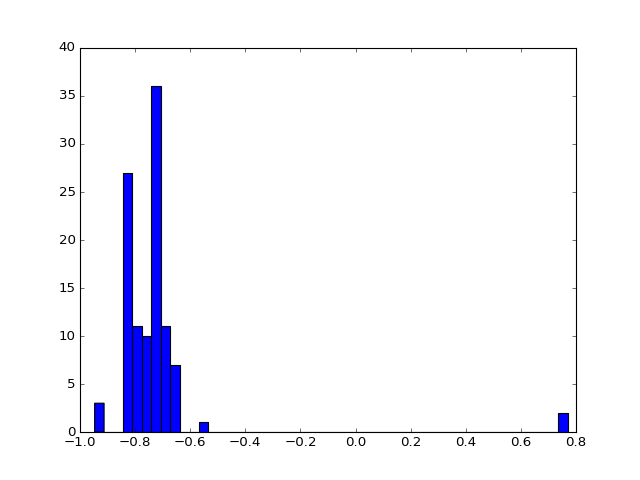

(array([ 3.,  0.,  0., 27., 11., 10., 36., 11.,  7.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.94693005, -0.91259456, -0.878259  , -0.8439235 , -0.80958796,
        -0.77525246, -0.7409169 , -0.7065814 , -0.67224586, -0.63791037,
        -0.6035748 , -0.5692393 , -0.53490376, -0.5005683 , -0.46623275,
        -0.43189722, -0.3975617 , -0.36322618, -0.32889065, -0.29455513,
        -0.2602196 , -0.22588408, -0.19154856, -0.15721303, -0.12287751,
        -0.08854198, -0.05420646, -0.01987094,  0.01446458,  0.04880011,
         0.08313563,  0.11747115,  0.15180667,  0.18614219,  0.22047772,
         0.25481325,  0.28914878,  0.3234843 ,  0.3578198 ,  0.39215532,
         0.42649084,  0.46082637,  0.4951619 ,  0.52949744,  0.56383294,
         0.5981685 ,  0.632504  ,  0.66683954,  0.70117503,

In [19]:
%matplotlib notebook
nn_mask = torch.norm(inputs - inputs[22], 2, dim=1) < 0.2
print(nn_mask.sum())
dim = 1
plt.hist(gts[nn_mask, dim], bins=50)
# plt.hist(diff[nn_mask, dim], bins=50)

<IPython.core.display.Javascript object>


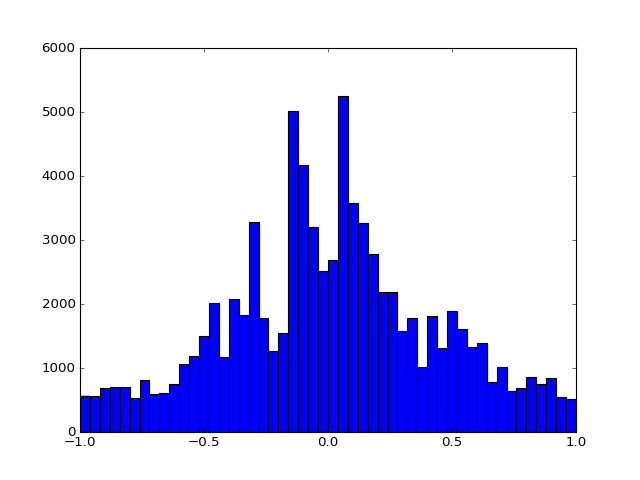

(array([ 558.,  568.,  685.,  697.,  702.,  533.,  805.,  592.,  604.,
         752., 1068., 1181., 1499., 2020., 1174., 2084., 1834., 3281.,
        1774., 1266., 1549., 5008., 4178., 3203., 2511., 2680., 5256.,
        3583., 3272., 2783., 2190., 2195., 1575., 1780., 1010., 1817.,
        1312., 1896., 1604., 1325., 1385.,  789., 1013.,  645.,  694.,
         860.,  743.,  838.,  540.,  522.]),
 array([-9.9993527e-01, -9.5993727e-01, -9.1993928e-01, -8.7994134e-01,
        -8.3994335e-01, -7.9994535e-01, -7.5994736e-01, -7.1994942e-01,
        -6.7995143e-01, -6.3995343e-01, -5.9995544e-01, -5.5995744e-01,
        -5.1995951e-01, -4.7996151e-01, -4.3996352e-01, -3.9996555e-01,
        -3.5996756e-01, -3.1996956e-01, -2.7997160e-01, -2.3997362e-01,
        -1.9997564e-01, -1.5997764e-01, -1.1997967e-01, -7.9981685e-02,
        -3.9983705e-02,  1.4275312e-05,  4.0012255e-02,  8.0010235e-02,
         1.2000822e-01,  1.6000620e-01,  2.0000419e-01,  2.4000217e-01,
         2.8000015e-01, 

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(gts[:, 0], bins=50)

# Cartpole 

In [4]:
from dataset import get_loader
from tqdm import tqdm
import torch
import numpy as np
system = 'sst_envs'
model = 'cartpole_obs'
batch = 2
# setup = 'default'
setup = "default_norm"
%cd /media/arclabdl1/HD1/Linjun/mpc-mpnet-py/mpnet
train_loader, test_loader = get_loader(system, model, batch_size=batch, setup=setup)


/media/arclabdl1/HD1/Linjun/mpc-mpnet-py/mpnet


In [5]:
len( train_loader.dataset)

18

In [8]:
d, gt = train_loader.dataset[:]
d,gt

(tensor([[ 0.0000,  0.1513,  0.4727, -0.6221, -0.2057,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000,  0.5363,  0.1110, -0.6258,  0.1291,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000, -0.5485,  0.3913, -0.1472, -0.8097,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000, -0.1888,  0.5916, -0.4729, -0.7990,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000,  0.5443, -0.0864, -0.5707,  0.3265,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000,  0.4474, -0.2848, -0.4301,  0.8736,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000, -0.0429,  0.5255, -0.5548, -0.5285,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000, -0.7475,  0.0590, -0.1547,  0.8012,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000,  0.4447,  0.2687, -0.6470,  0.0519,  0.3895, -0.3659, -0.3471,
           1.0000],
         [ 0.0000, -0.6718,  0.2030, -0.0770,  0.1419,  0.3895, -0.3659, -0.3471,


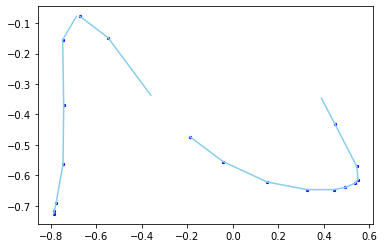

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
s = d[:, 1:5]

for i in range(len(d)):
    plt.scatter(s[i, 0], s[i,2], s=5, c='blue')
#     plt.scatter(gt[i, 0], gt[i, 2], s=20, c='green')
    plt.plot([s[i, 0], gt[i, 0]], [s[i, 2], gt[i, 2]], c="skyblue")

## Voxels

In [5]:
env_vox = torch.from_numpy(np.load('{}/{}_env_vox.npy'.format(system, model))).float()[:, 0, :, :]
env_vox.shape

torch.Size([10, 32, 32])

<IPython.core.display.Javascript object>


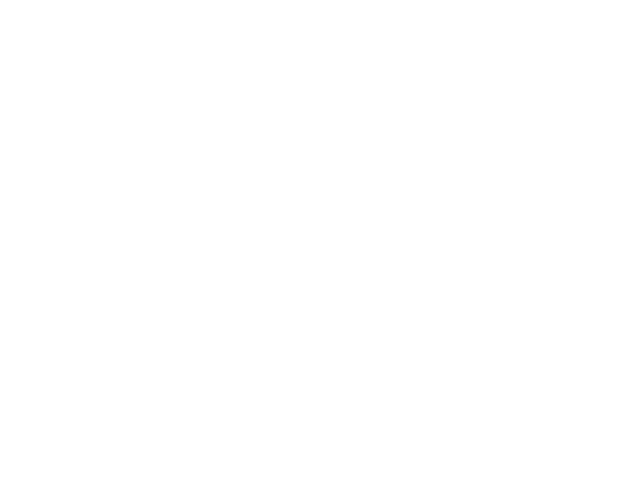

In [6]:
%matplotlib notebook
from matplotlib import pyplot as plt

for i in range(env_vox.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(env_vox[i])

<IPython.core.display.Javascript object>


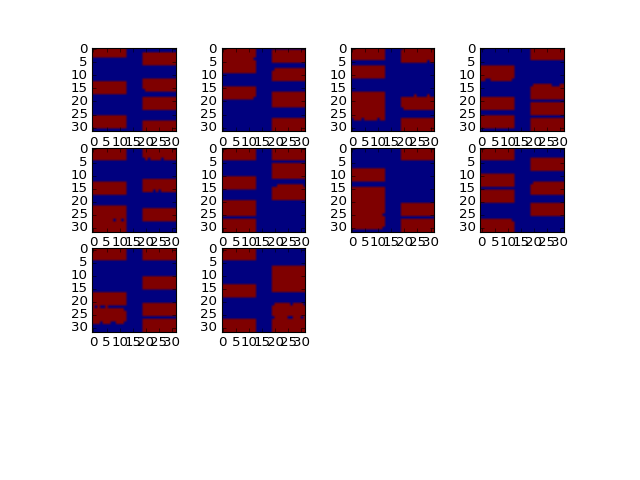

In [7]:
system = 'sst_envs'
model = 'cartpole_obs'
env_vox = torch.from_numpy(np.load('{}/{}_env_vox.npy'.format(system, model))).float()[:, 0, :, :]
env_vox.shape
%matplotlib notebook
from matplotlib import pyplot as plt

for i in range(env_vox.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(env_vox[i])